In [66]:
import pymc3 as pm
import scipy as sp
import numpy as np
import theano.tensor as tt
import scipy.stats
import arviz as az

np.random.seed(1)

## Simulation data

In [99]:
k = 4
alpha = np.ones(k) * 0.5
total_count = np.array([100])
n_samples = 10

p = sp.stats.dirichlet(alpha).rvs(size=n_samples)
y = np.stack([sp.stats.multinomial(n=total_count[0], p=p[i,:]).rvs()[0] for i in range(n_samples)])
y

array([[25, 34,  3, 38],
       [73, 10, 15,  2],
       [11,  5, 78,  6],
       [53, 34,  9,  4],
       [12, 40, 29, 19],
       [ 6,  0,  8, 86],
       [37,  7, 54,  2],
       [13, 49, 25, 13],
       [ 9, 24, 35, 32],
       [20,  6, 74,  0]])

## Explicit Model

In [100]:
with pm.Model() as model_explicit:
    a = pm.Dirichlet('a', a=np.ones(k))
    alpha = pm.Lognormal('alpha', mu=1, sigma=1)
    pi = pm.Dirichlet('pi', a=a * alpha, shape=(n_samples, k))
    obs = pm.Multinomial('obs', n=total_count, p=pi, shape=(total_count, 4), observed=y)
    trace_explicit = pm.sample(chains=4, return_inferencedata=True)

/Users/byronsmith/anaconda3/envs/pymc3-dev/lib/python3.9/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [pi, alpha, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
There were 113 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.556212140157043, but should be close to 0.8. Try to increase the number of tuning steps.
There were 192 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5749950778902368, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>]], dtype=object)

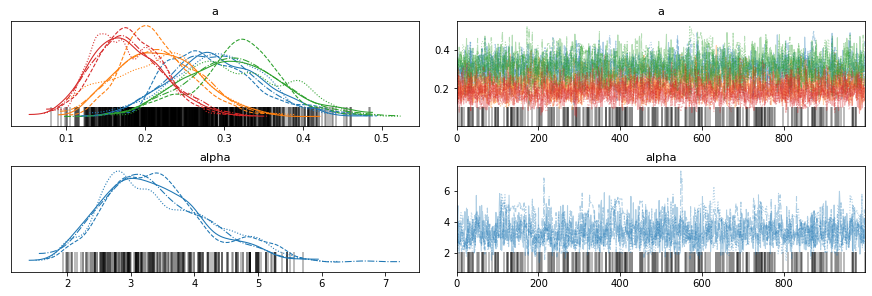

In [101]:
az.plot_trace(data=trace_explicit, var_names=['a', 'alpha'], compact=True)

In [102]:
az.summary(trace_explicit, var_names=['a', 'alpha'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a[0],0.289,0.059,0.185,0.406,0.003,0.002,410.0,403.0,416.0,679.0,1.00
a[1],0.217,0.052,0.119,0.312,0.002,0.002,458.0,458.0,448.0,463.0,1.02
a[2],0.314,0.062,0.201,0.434,0.002,0.002,711.0,711.0,706.0,1195.0,1.01
a[3],0.179,0.045,0.100,0.265,0.001,0.001,945.0,945.0,917.0,1374.0,1.01
alpha,3.404,0.829,1.983,4.997,0.043,0.031,370.0,366.0,375.0,617.0,1.01


## Marginalized model

In [106]:
with pm.Model() as model_marginalized:
    a = pm.Dirichlet('a', a=np.ones(k))
    alpha = pm.Lognormal('alpha', mu=1, sigma=1)
    obs = pm.DirichletMultinomial('obs', n=total_count, alpha=a * alpha, shape=(total_count, 4), observed=y)
    trace_marginalized = pm.sample(chains=4, return_inferencedata=True)

/Users/byronsmith/anaconda3/envs/pymc3-dev/lib/python3.9/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [alpha, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>]], dtype=object)

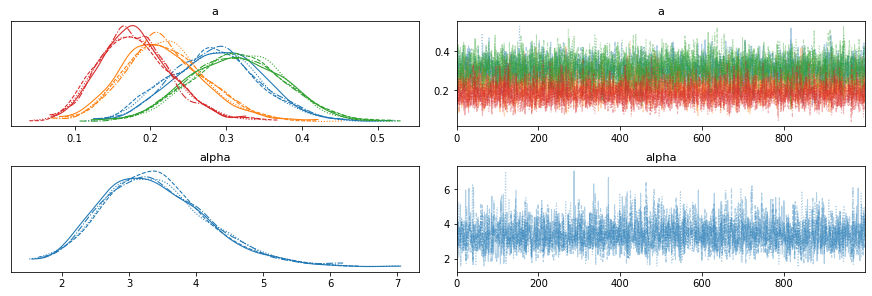

In [107]:
az.plot_trace(data=trace_marginalized, var_names=['a', 'alpha'], compact=True)

In [108]:
az.summary(trace_marginalized, var_names=['a', 'alpha'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a[0],0.286,0.059,0.179,0.395,0.001,0.001,2678.0,2678.0,2643.0,2202.0,1.0
a[1],0.219,0.054,0.120,0.322,0.001,0.001,2938.0,2938.0,2870.0,2342.0,1.0
a[2],0.314,0.061,0.204,0.428,0.001,0.001,3140.0,3108.0,3129.0,2654.0,1.0
a[3],0.181,0.048,0.098,0.279,0.001,0.001,4678.0,4390.0,4740.0,3282.0,1.0
alpha,3.401,0.808,1.944,4.921,0.014,0.010,3526.0,3387.0,3573.0,2988.0,1.0
